Data Exploration

In [1]:
import os

# Define the path to your dataset
source_dir = 'pure_dataset'

# Function to count samples in each subfolder (category)
def count_samples_in_category(source_dir):
    category_counts = {}
    # Iterate over each category folder
    for category in os.listdir(source_dir):
        category_path = os.path.join(source_dir, category)
        if os.path.isdir(category_path):
            # Count the number of files in each category folder
            num_files = len(os.listdir(category_path))
            category_counts[category] = num_files
    return category_counts

category_counts = count_samples_in_category(source_dir)
print(category_counts)

{'benignware': 2999, 'gray': 669, 'hackware': 103, 'malware': 711}


In [2]:
# Image Dimension
import os
from PIL import Image
from collections import defaultdict

# Function to explore the dataset and count image dimensions
def explore_data(source_dir):
    dimension_counts = defaultdict(int)
    
    # Loop through each class in the dataset
    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)
        if os.path.isdir(class_path):
            # Loop through each file in the class directory
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                try:
                    with Image.open(file_path) as img:
                        # Get the dimensions of the image
                        dimensions = img.size
                        dimension_counts[dimensions] += 1
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
    
    return dimension_counts

# Call the function to explore the dataset
dimension_counts = explore_data(source_dir)

# Print the dimension counts
print("Image dimension counts:")
for dim, count in dimension_counts.items():
    print(f"Dimensions {dim}: {count} images")

Image dimension counts:
Dimensions (32, 32): 3813 images
Dimensions (100, 100): 669 images


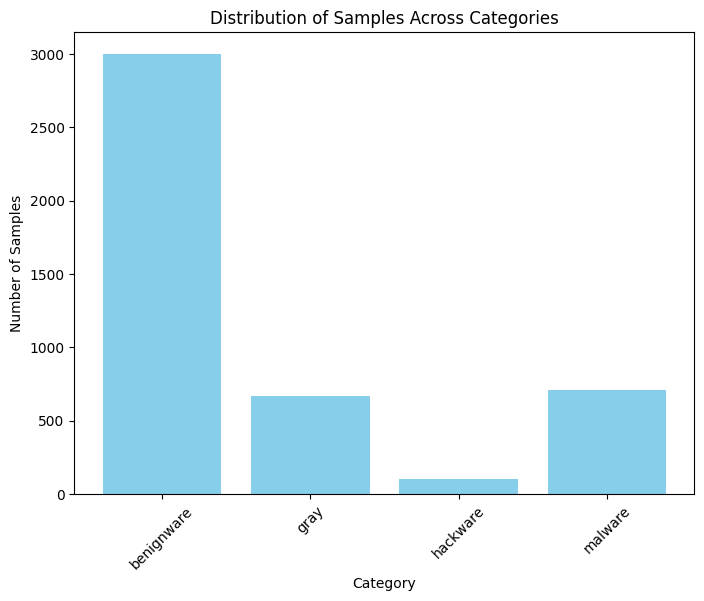

In [3]:
#Distribution by Histogram
import matplotlib.pyplot as plt

def plot_category_distribution(category_counts):
    categories = list(category_counts.keys())
    counts = list(category_counts.values())
    
    plt.figure(figsize=(8, 6))
    plt.bar(categories, counts, color='skyblue')
    plt.xlabel('Category')
    plt.ylabel('Number of Samples')
    plt.title('Distribution of Samples Across Categories')
    plt.xticks(rotation=45)
    plt.show()

plot_category_distribution(category_counts)

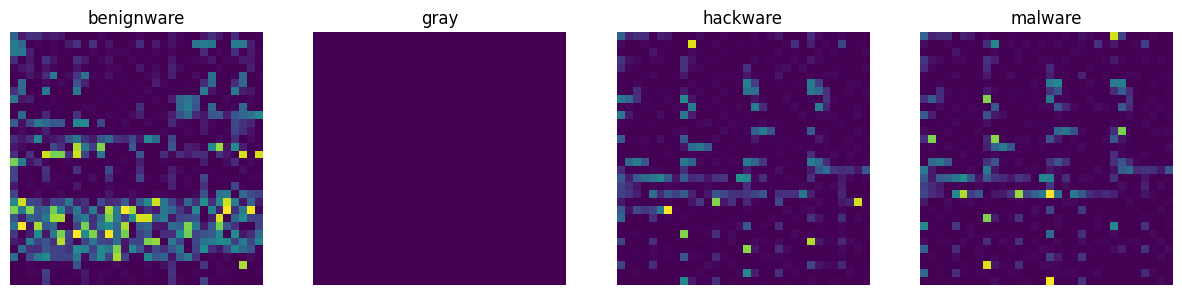

In [7]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to your dataset
source_dir = 'pure_dataset'

# Function to count samples in each subfolder (category) and show one image from each category
def count_samples_and_show_images(source_dir):
    category_counts = {}
    fig, axes = plt.subplots(1, len(os.listdir(source_dir)), figsize=(15, 5))  # Create subplots for each category
    # Iterate over each category folder
    for idx, category in enumerate(os.listdir(source_dir)):
        category_path = os.path.join(source_dir, category)
        if os.path.isdir(category_path):
            # Count the number of files in each category folder
            num_files = len(os.listdir(category_path))
            category_counts[category] = num_files
            
            # Get a list of files in the category folder and show one image
            image_files = [f for f in os.listdir(category_path) if f.endswith(('jpg', 'jpeg', 'png'))]
            if image_files:
                image_path = os.path.join(category_path, image_files[0])  # Select the first image
                img = Image.open(image_path)
                
                # Show the image in a subplot
                axes[idx].imshow(img)
                axes[idx].set_title(category)
                axes[idx].axis('off')  # Hide the axis
        
    plt.show()
    return category_counts

category_counts = count_samples_and_show_images(source_dir)

In [8]:
def check_corrupted_images(source_dir):
    corrupted_files = []
    
    for category in os.listdir(source_dir):
        category_path = os.path.join(source_dir, category)
        if os.path.isdir(category_path):
            for img_file in os.listdir(category_path):
                img_path = os.path.join(category_path, img_file)
                try:
                    img = Image.open(img_path)
                    img.verify()  # Verify the image
                except (IOError, SyntaxError) as e:
                    corrupted_files.append(img_path)
    
    return corrupted_files

corrupted_images = check_corrupted_images(source_dir)
if corrupted_images:
    print(f"Found {len(corrupted_images)} corrupted images: {corrupted_images}")
else:
    print("No corrupted images found.")

No corrupted images found.


In [9]:
def image_format_distribution(source_dir):
    format_counts = {}
    
    for category in os.listdir(source_dir):
        category_path = os.path.join(source_dir, category)
        if os.path.isdir(category_path):
            for img_file in os.listdir(category_path):
                img_path = os.path.join(category_path, img_file)
                try:
                    img = Image.open(img_path)
                    img_format = img.format
                    format_counts[img_format] = format_counts.get(img_format, 0) + 1
                except Exception as e:
                    continue
    
    return format_counts

# Example usage
format_distribution = image_format_distribution(source_dir)
print(format_distribution)

{'JPEG': 4482}


Data Preprocessing

In [1]:
# Count Class Weight

from sklearn.utils import class_weight
import numpy as np

# Class distribution
class_distribution = {'benignware': 2999, 'gray': 669, 'hackware': 103, 'malware': 711}

# Classes in the same order as the categorical encoding from the generator
classes = ['benignware', 'gray', 'hackware', 'malware']

# Extract the sample counts
sample_counts = np.array([class_distribution[class_name] for class_name in classes])

# Calculate class weights
total_samples = np.sum(sample_counts)
class_weight = {i: total_samples / (len(classes) * sample_counts[i]) for i in range(len(classes))}

print("Calculated class weights:", class_weight)

Calculated class weights: {0: 0.37362454151383795, 1: 1.6748878923766817, 2: 10.87864077669903, 3: 1.5759493670886076}


In [2]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Step 2: Define dataset paths
dataset_dir = 'firmwareimage_dataset/'  # Assuming dataset folder in current directory

# Step 3: Data Preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    validation_split=0.2  # Split 20% for testing
)

# Load training dataset (80% of the data)
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),  # Resize images to 224x224, as expected by MobileNet
    batch_size=32,
    class_mode='categorical',  # Assuming multi-class classification
    subset='training')  # 80% for training

# Load test dataset (20% of the data)
test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # 20% for testing

Found 3588 images belonging to 4 classes.
Found 894 images belonging to 4 classes.


MobileNetV2 Model

In [7]:
# Step 4: Load the MobileNet model without the top layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 5: Add new classification layers on top of MobileNet
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Final output layer

# Step 6: Build the final model
mobilenet_model = Model(inputs=base_model.input, outputs=predictions)

# Step 7: Freeze the layers of MobileNet except the newly added ones
for layer in base_model.layers:
    layer.trainable = False

# Step 8: Compile the model with a learning rate of 0.001
mobilenet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the calculated class weights
mobilenet_model.fit(
    train_generator,
    epochs=10, 
    validation_data=test_generator  # Use the test data for validation
)


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 542ms/step - accuracy: 0.7526 - loss: 0.7097 - val_accuracy: 0.8714 - val_loss: 0.3487
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 74s 638ms/step - accuracy: 0.8766 - loss: 0.3173 - val_accuracy: 0.8960 - val_loss: 0.3433
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 57s 492ms/step - accuracy: 0.8979 - loss: 0.2720 - val_accuracy: 0.8826 - val_loss: 0.3653
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 486ms/step - accuracy: 0.9022 - loss: 0.2443 - val_accuracy: 0.9284 - val_loss: 0.2409
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 485ms/step - accuracy: 0.9254 - loss: 0.1923 - val_accuracy: 0.9239 - val_loss: 0.2587
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 57s 491ms/step - accuracy: 0.9236 - loss: 0.1856 - val_accuracy: 0.9139 - val_loss: 0.3017
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 486ms/step - accuracy: 0.9185 - loss: 0.1985 - val_accuracy: 0.9206 - val_loss: 0.2540
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 60s 518ms/step - accuracy: 0.9346 - loss: 0

In [8]:
# Step 10: Evaluate the model on the test set
test_loss, test_acc = mobilenet_model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')

28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 414ms/step - accuracy: 0.9223 - loss: 0.3156
Test accuracy: 91.95%


In [10]:
import numpy as np
from sklearn.metrics import classification_report

# Get the true labels and predicted labels
Y_pred = mobilenet_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels from the generator
y_true = test_generator.classes

# Get the class labels (this will map class indices to class names)
class_labels = list(test_generator.class_indices.keys())

# Classification report gives precision, recall, and f1-score per class
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)

28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 533ms/step

              precision    recall  f1-score   support

   benignware       0.91      0.91      0.91       599
         gray       0.91      0.91      0.91       133
     hackware       0.90      0.90      0.91        20
      malware       0.90      0.90      0.90       142

    accuracy                           0.91       894
   macro avg       0.91      0.91      0.91       894
weighted avg       0.91      0.91      0.91       894



c:\Users\Renee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Renee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Renee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [10]:
# Save Model
mobilenet_model.save("mobilenet_model.h5")

EfficientNet

In [6]:
from tensorflow.keras.applications import EfficientNetB0  # Import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load EfficientNetB0 without the top classification layer (include_top=False)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers for your classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling layer to reduce dimensionality
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(4, activation='softmax')(x)  # Output layer for 4 classes

# Create the final model
efficientnet_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model (EfficientNetB0) so they don't update during the initial training
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
efficientnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model using the calculated class weights
efficientnet_model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs based on your dataset size
    validation_data=test_generator # Use the test data for validation
)

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 91s 749ms/step - accuracy: 0.6581 - loss: 0.9720 - val_accuracy: 0.6700 - val_loss: 0.9458
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 86s 747ms/step - accuracy: 0.6668 - loss: 0.9599 - val_accuracy: 0.6700 - val_loss: 0.9363
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 82s 717ms/step - accuracy: 0.6590 - loss: 0.9658 - val_accuracy: 0.6700 - val_loss: 0.9412
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 79s 690ms/step - accuracy: 0.6617 - loss: 0.9499 - val_accuracy: 0.6700 - val_loss: 0.9363
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 79s 687ms/step - accuracy: 0.6765 - loss: 0.9329 - val_accuracy: 0.6700 - val_loss: 0.9309
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 74s 647ms/step - accuracy: 0.6756 - loss: 0.9277 - val_accuracy: 0.6700 - val_loss: 0.9305
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 75s 656ms/step - accuracy: 0.6624 - loss: 0.9471 - val_accuracy: 0.6700 - val_loss: 0.9333
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 75s 655ms/step - accuracy: 0.6706 - loss: 0

In [8]:
# Step 10: Evaluate the model on the test set
test_loss, test_acc = efficientnet_model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')

28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 562ms/step - accuracy: 0.6750 - loss: 0.9268
Test accuracy: 67.00%


In [9]:
import numpy as np
from sklearn.metrics import classification_report

# Get the true labels and predicted labels
Y_pred = efficientnet_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels from the generator
y_true = test_generator.classes

# Get the class labels (this will map class indices to class names)
class_labels = list(test_generator.class_indices.keys())

# Classification report gives precision, recall, and f1-score per class
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)

28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 577ms/step
Classification Report:
               precision    recall  f1-score   support

  benignware       0.67      1.00      0.80       599
        gray       0.00      0.00      0.00       133
    hackware       0.00      0.00      0.00        20
     malware       0.00      0.00      0.00       142

    accuracy                           0.67       894
   macro avg       0.17      0.25      0.20       894
weighted avg       0.45      0.67      0.54       894



c:\Users\Renee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Renee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Renee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo